In [1]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [2]:
path_cats_and_dogs = f"{getcwd()}/datasets/cats-and-dogs.zip"
# shutil.rmtree('datasets')

local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('datasets')
zip_ref.close()

In [3]:
print(len(os.listdir('datasets/PetImages/Cat/')))
print(len(os.listdir('datasets/PetImages/Dog/')))

12501
12501


In [4]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
data_dir = 'datasets/cats-v-dogs'

try:
    #YOUR CODE GOES HERE
    # shutil.rmtree('datasets/cats-v-dogs')
    os.mkdir('datasets/cats-v-dogs')
    os.mkdir('datasets/cats-v-dogs/training')
    os.mkdir('datasets/cats-v-dogs/testing')
    os.mkdir('datasets/cats-v-dogs/training/cats/')
    os.mkdir('datasets/cats-v-dogs/training/dogs/')
    os.mkdir('datasets/cats-v-dogs/testing/cats/')
    os.mkdir('datasets/cats-v-dogs/testing/dogs/')
except OSError:
    pass

In [ ]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    files = []
    for file_name in os.listdir(SOURCE):
        file = SOURCE + file_name
        if os.path.getsize(file) > 0:
            files.append(file_name)
        else:
            print(f'File: {file_name} Omitted because zero file length')
    dataset_length = len(files)
    train_length = int(dataset_length * SPLIT_SIZE)
    test_length = dataset_length - train_length
    print(f'\nDataset Length: {dataset_length}')
    print(f'\nTest Dataset Length: {train_length}')
    print(f'\nTraining Dataset Length: {test_length}')
    randomized_set = random.sample(files, dataset_length)
    train_dataset = randomized_set[0:train_length]
    test_dataset = randomized_set[-test_length:]
    for file_name in train_dataset:
        copyfile(SOURCE+file_name, TRAINING+file_name)
    for file_name in test_dataset:
        copyfile(SOURCE+file_name, TESTING+file_name)
# YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "datasets/PetImages/Cat/"
TRAINING_CATS_DIR = "datasets/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "datasets/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "datasets/PetImages/Dog/"
TRAINING_DOGS_DIR = "datasets/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "datasets/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

File: 666.jpg Omitted because zero file length

Dataset Length: 12500

Test Dataset Length: 11250

Training Dataset Length: 1250
File: 11702.jpg Omitted because zero file length

Dataset Length: 12500

Test Dataset Length: 11250

Training Dataset Length: 1250


In [7]:
print(len(os.listdir('datasets/cats-v-dogs/training/cats/')))
print(len(os.listdir('datasets/cats-v-dogs/training/dogs/')))
print(len(os.listdir('datasets/cats-v-dogs/testing/cats/')))
print(len(os.listdir('datasets/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [8]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    # 150x150 resolution and last channel with 3 for RGB value from 0 to 255 each
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [9]:
TRAINING_DIR = 'datasets/cats-v-dogs/training' #YOUR CODE HERE
train_datagen = ImageDataGenerator(rescale=1.0/255.) #YOUR CODE HERE

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
#YOUR CODE HERE
    TRAINING_DIR,
    batch_size=10,
    class_mode='binary',
    target_size=(150,150)
)

VALIDATION_DIR = 'datasets/cats-v-dogs/testing'#YOUR CODE HERE
validation_datagen = ImageDataGenerator(rescale=1.0/255.) #YOUR CODE HERE

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(
#YOUR CODE HERE
    VALIDATION_DIR,
    batch_size=10,
    class_mode='binary',
    target_size=(150,150)
)



# Expected Output:
# Found ~22500 images belonging to 2 classes.
# Found   2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [9]:
history = model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/10
1493/2250 [==================>...........] - ETA: 1:29 - loss: 0.4629 - acc: 0.7911

c:\users\brian\pycharmprojects\tf_certification\venv\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


2250/2250 [==============================] - 270s 120ms/step - loss: 0.4599 - acc: 0.7973 - val_loss: 0.5152 - val_acc: 0.7456
Epoch 2/10
2250/2250 [==============================] - 272s 121ms/step - loss: 0.4426 - acc: 0.8082 - val_loss: 0.4509 - val_acc: 0.7944
Epoch 3/10
2250/2250 [==============================] - 334s 148ms/step - loss: 0.4319 - acc: 0.8161 - val_loss: 0.4327 - val_acc: 0.8144
Epoch 4/10
2250/2250 [==============================] - 330s 146ms/step - loss: 0.4246 - acc: 0.8194 - val_loss: 0.4883 - val_acc: 0.8156
Epoch 5/10
1389/2250 [=================>............] - ETA: 1:57 - loss: 0.4132 - acc: 0.8293

KeyboardInterrupt: 

Text(0.5, 1.0, 'Training and validation loss')

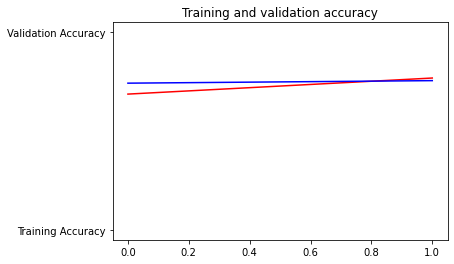

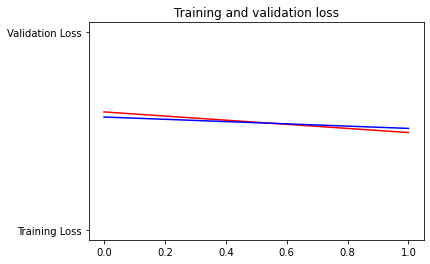

In [8]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)